In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

### Visualization Makeover 2

#### Original Visualization:
https://ourworldindata.org/alcohol-consumption

#### Data Source:
https://www.who.int/data/gho/data/indicators/indicator-details/GHO/total-(recorded-unrecorded)-alcohol-per-capita-(15-)-consumption

In [122]:
FILE = 'beer-consumption-per-person.csv'

df_beer = pd.read_csv(FILE)
df_beer.head()

,Entity,Code,Year,liters
0,Afghanistan,AFG,1961,0.0
1,Afghanistan,AFG,1962,0.0
2,Afghanistan,AFG,1963,0.0
3,Afghanistan,AFG,1964,0.0
4,Afghanistan,AFG,1965,0.0


9.51
5.26


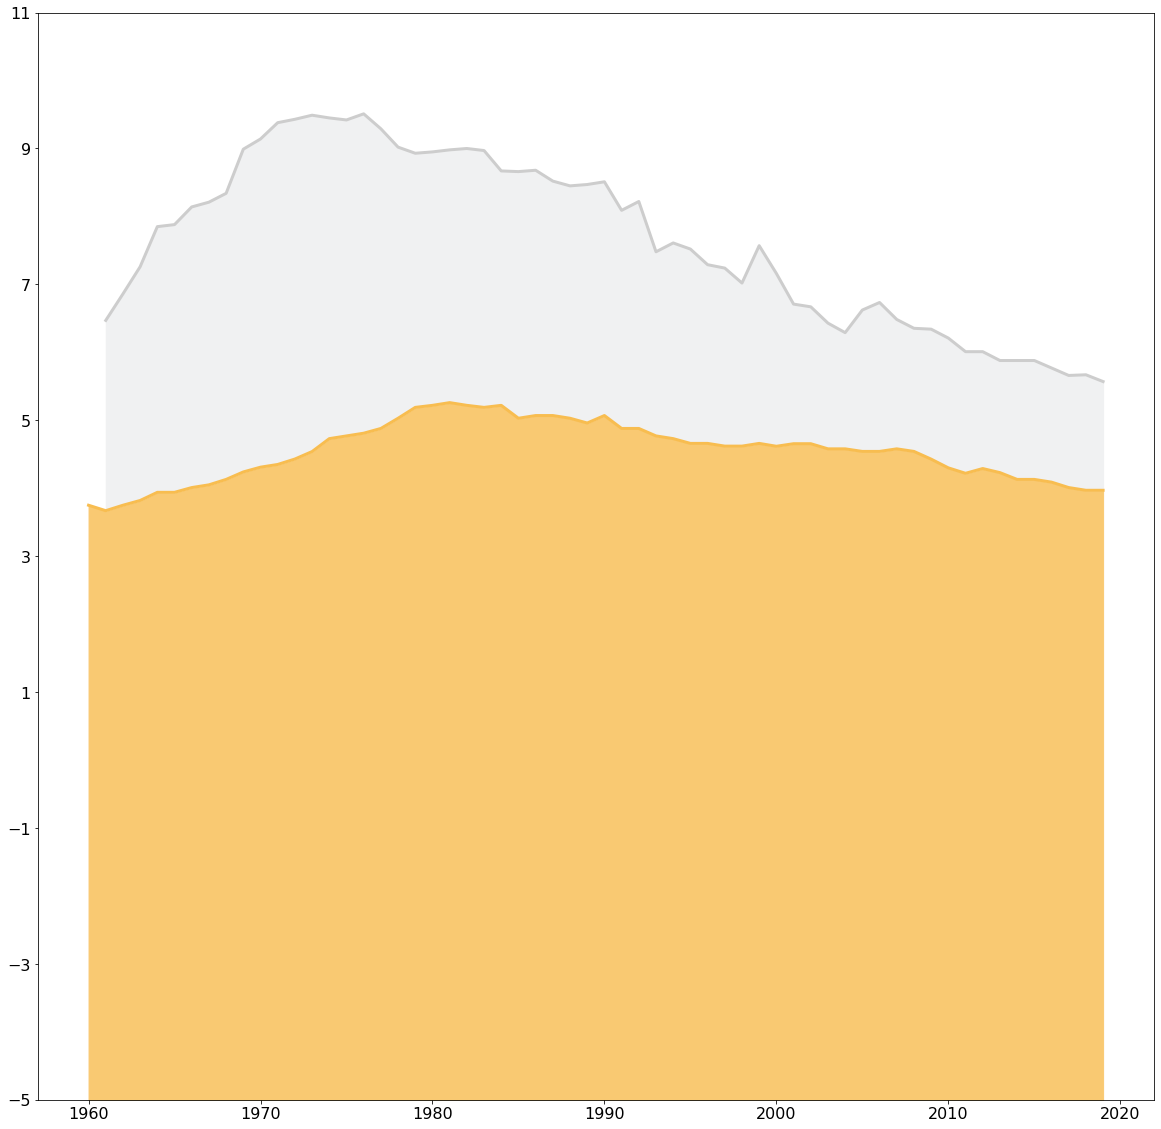

In [120]:
# United States liters per person per year
us = df_beer[df_beer['Entity']=='United States'][['Year', 'liters']].set_index('Year')

# Germany liters per person per year
de = df_beer[df_beer['Entity']=='Germany'][['Year', 'liters']].set_index('Year')

# Merge the two countries
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), [us, de])

plt.figure(figsize=(20, 20))
plt.ylim((-5,10))
plt.yticks(np.arange(-5, 12, 2), fontsize=16)
plt.xticks(fontsize=16)
plt.plot(us.index, us.liters, c='#f8bd50', linewidth=3)
plt.plot(de.index, de.liters, c='#cdcdcd', linewidth=3)

plt.fill_between(us.index, us.liters, -5, color='#f9c972')
plt.fill_between(de.index, de.liters, us.liters[1:], color='#f0f1f2')
# plt.savefig('plot')
# Gray: '#f9c972' 230, 230, 230
# orange '#ccd1d9'

print(de.liters.max())
print(us.liters.max())

### Top and Bottom 5 Countries by liters per person per year

In [183]:
df_sorted = df_beer.groupby('Entity')['liters'].max().sort_values(ascending=False)

top_5 = df_sorted[:5].sort_values()
bot_5 = df_sorted[-5:].sort_values(ascending=False)

countries = top_5.index
values = top_5.to_numpy()
countries

Index(['Belgium', 'Germany', 'Australia', 'Ireland', 'Eswatini'], dtype='object', name='Entity')

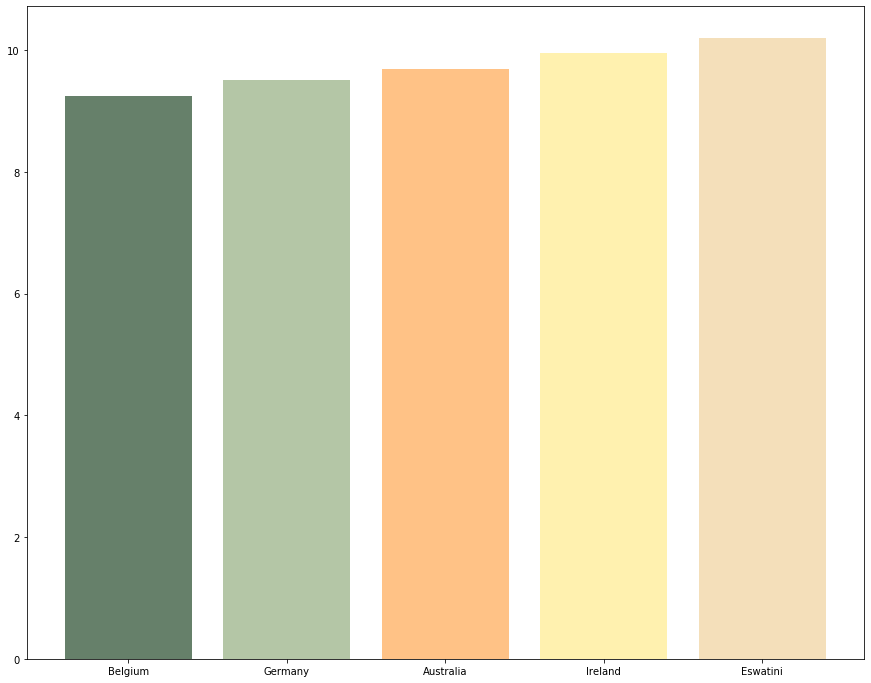

In [167]:
plt.figure(figsize=(15,12))

plt.bar(countries, values, color=['#66806A', '#B4C6A6', '#FFC286', '#FFF1AF', '#F4DFBA'])
plt.savefig('top')
# plt.axis('off')

# ['#876445', '#CA965C', '#EEC373', '#FFF1AF', '#F4DFBA']

In [187]:
countries = bot_5.index
values = bot_5.to_numpy()

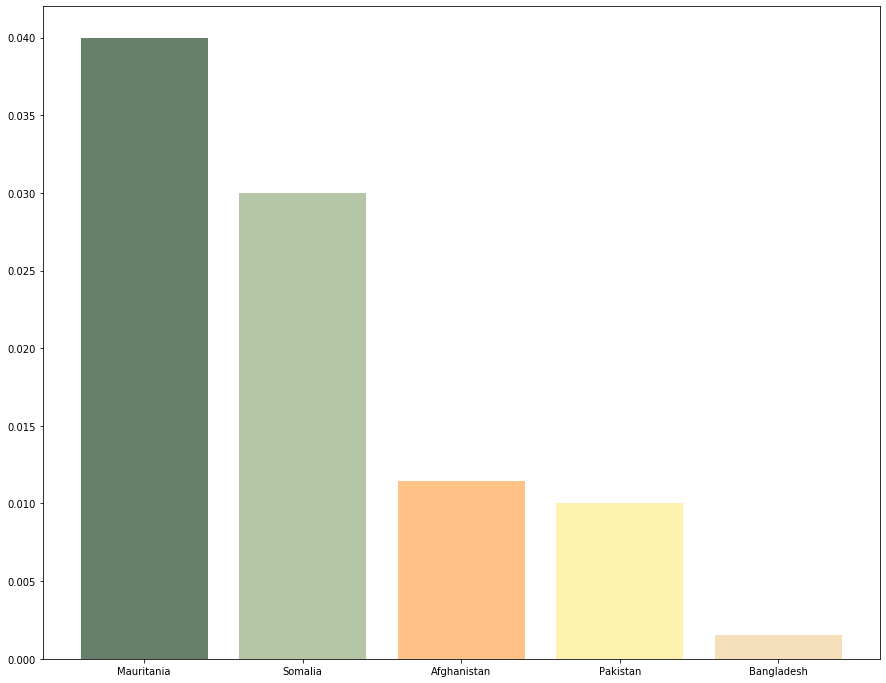

In [176]:
plt.figure(figsize=(15,12))
plt.bar(countries, values, color=['#66806A', '#B4C6A6', '#FFC286', '#FFF1AF', '#F4DFBA'])
plt.savefig('bot')